In [34]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score, roc_auc_score 
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prepare the data 

In [100]:
# import the dataset
file = 'Autism-Child-Data.txt'
# 'C:/users/brend/tutorial/autism-data.txt'
names = ['A1_Score',  'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
         'A6_Score' ,'A7_Score' ,'A8_Score','A9_Score' ,'A10_Score' ,'age','gender' ,'ethnicity' ,
         'jundice' ,'austim','contry_of_res' ,'used_app_before','result' ,'age_desc' ,'relation' ,
         'Class'] 
data = pd.read_table(file, sep = ',', index_col = None, names= names)

In [101]:
# drop unwanted columns
data = data.drop(['result', 'age_desc'], axis=1)

In [102]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         292 non-null    int64 
 1   A2_Score         292 non-null    int64 
 2   A3_Score         292 non-null    int64 
 3   A4_Score         292 non-null    int64 
 4   A5_Score         292 non-null    int64 
 5   A6_Score         292 non-null    int64 
 6   A7_Score         292 non-null    int64 
 7   A8_Score         292 non-null    int64 
 8   A9_Score         292 non-null    int64 
 9   A10_Score        292 non-null    int64 
 10  age              292 non-null    object
 11  gender           292 non-null    object
 12  ethnicity        292 non-null    object
 13  jundice          292 non-null    object
 14  austim           292 non-null    object
 15  contry_of_res    292 non-null    object
 16  used_app_before  292 non-null    object
 17  relation         292 non-null    ob

In [103]:
# create X and Y datasets for training
X = data.drop(['Class'], 1)
y = data['Class']

C:\Users\aahmed2\AppData\Local\Temp\ipykernel_17292\4057099344.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop(['Class'], 1)


In [105]:
X = pd.get_dummies(X, drop_first= True)
y = pd.get_dummies(y,  drop_first= True)

In [106]:
y = y.values

In [107]:
y = np.reshape (y, (292, ))

In [108]:
y.shape

(292,)

In [ ]:
# y = y.iloc [:, 1]

In [61]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Fitting multiple models 

## Defind models 

In [111]:
dic_a = {
    "a" : 5,
    2: 10,
    0: 20
        }


dic_a ["a"]

5

In [112]:
dic_a [2]

10

## Performance measure 

In [64]:
def perf_measure (y_true, y_pred):
    
    all_per_list  = []
    
    all_per_list.append (accuracy_score (y_true, y_pred))
    all_per_list.append (recall_score (y_true, y_pred))
    all_per_list.append (precision_score (y_true, y_pred))
    all_per_list.append (f1_score (y_true, y_pred))
    all_per_list.append (roc_auc_score (y_true, y_pred))
    
    return all_per_list

In [65]:
def confusion_matrix_function (y_valid, y_pred):
    #initialize graph 
    
    #Get the confusion matrix
    DT_matrix = confusion_matrix (y_valid, y_pred, normalize ="true")
    return DT_matrix


#     #add lable 
#     plt.ylabel('predicted')
#     plt.xlabel('True')

In [66]:
def perf (b,c):
    
    a = b+c 
    return a


perf (5,2)   

7

In [67]:
f = [] 

f.append (5)
f.append (6)

f

[5, 6]

In [68]:
y.shape

(292,)

## Training and testing  

In [115]:
# LR_clf  = 

models = {
    
    "LR": LogisticRegression(penalty="l2", C=1e42, solver='liblinear'), 
    
    "DT": DecisionTreeClassifier(),
    "bagging": BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1),
    "adab": AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1), 
    "KNN": KNeighborsClassifier(n_neighbors=2),
    "RF": RandomForestClassifier (),
    "MLP": MLPClassifier(hidden_layer_sizes=[(10)], activation='logistic', solver='lbfgs', random_state=1)
    
    
    
}

In [116]:
Perf_per_algorithm = {} 

y_pred = {} # store y_predicted 
cm = {}  # store confusion  matrix 

for k, v in models.items ():
    
    clf = v
    clf.fit (train_X, train_y)
    y_pred [k] = clf.predict (valid_X)
    Perf_per_algorithm [k] = perf_measure (valid_y,  y_pred [k])
    cm [k] = confusion_matrix (valid_y,
                           y_pred [k], normalize ="true")
    


In [118]:
cm ['LR']

array([[0.94915254, 0.05084746],
       [0.05172414, 0.94827586]])

In [119]:
cm ['DT']

array([[0.88135593, 0.11864407],
       [0.15517241, 0.84482759]])

In [117]:
cm

{'LR': array([[0.94915254, 0.05084746],
        [0.05172414, 0.94827586]]),
 'DT': array([[0.88135593, 0.11864407],
        [0.15517241, 0.84482759]]),
 'bagging': array([[0.93220339, 0.06779661],
        [0.17241379, 0.82758621]]),
 'adab': array([[0.89830508, 0.10169492],
        [0.15517241, 0.84482759]]),
 'KNN': array([[0.93220339, 0.06779661],
        [0.25862069, 0.74137931]]),
 'RF': array([[0.96610169, 0.03389831],
        [0.17241379, 0.82758621]]),
 'MLP': array([[0.94915254, 0.05084746],
        [0.10344828, 0.89655172]])}

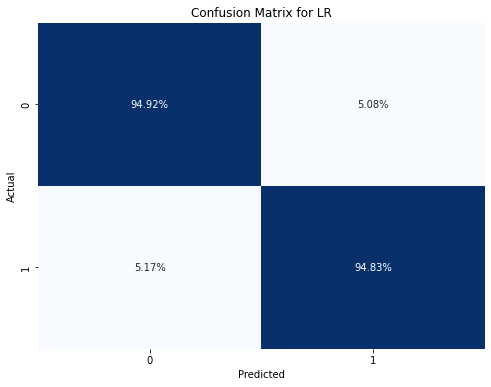

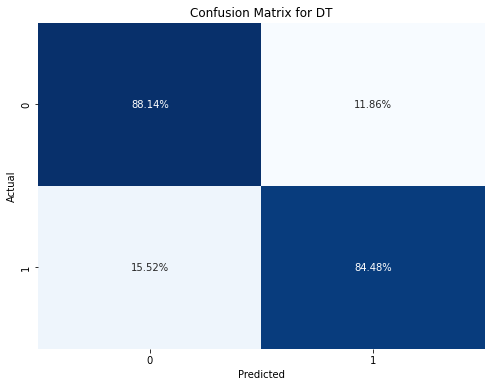

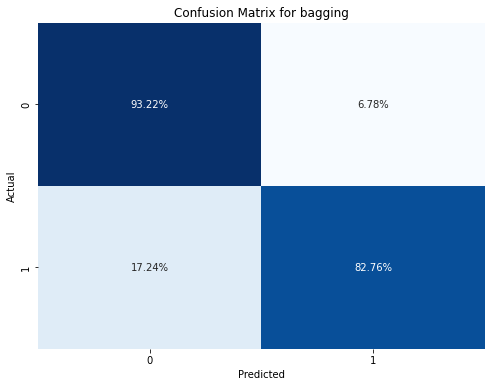

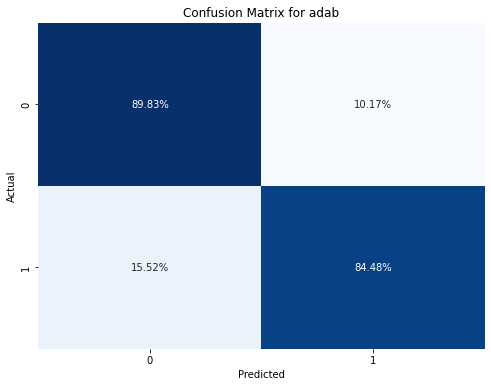

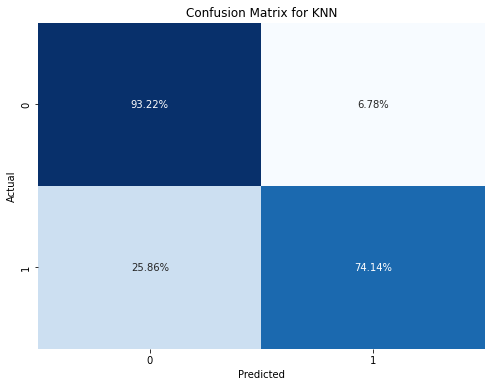

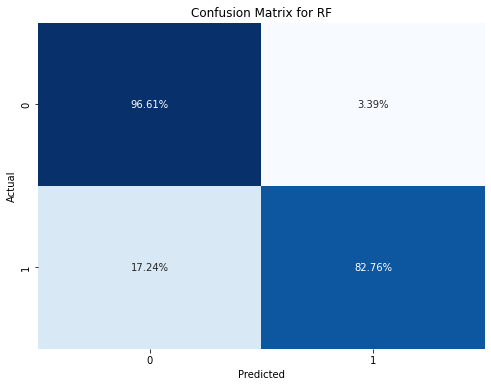

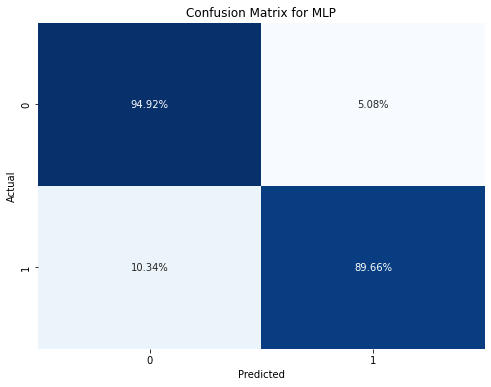

In [120]:
for model_name, matrix in cm.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, 
                    fmt='.2%',
                    cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
y_pred

In [2]:
(93+74)/2

83.5

<AxesSubplot: >

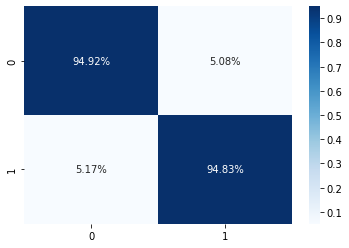

In [121]:
sns.heatmap(confusion_matrix (valid_y, y_pred ['LR'], normalize ="true"), annot=True, fmt='.2%', cmap='Blues')

In [122]:
Perf_per_algorithm

{'LR': [0.9487179487179487,
  0.9482758620689655,
  0.9482758620689655,
  0.9482758620689655,
  0.9487142022209234],
 'DT': [0.8632478632478633,
  0.8448275862068966,
  0.875,
  0.8596491228070176,
  0.8630917592051432],
 'bagging': [0.8803418803418803,
  0.8275862068965517,
  0.9230769230769231,
  0.8727272727272727,
  0.87989479836353],
 'adab': [0.8717948717948718,
  0.8448275862068966,
  0.8909090909090909,
  0.8672566371681416,
  0.8715663354763298],
 'KNN': [0.8376068376068376,
  0.7413793103448276,
  0.9148936170212766,
  0.819047619047619,
  0.836791350087668],
 'RF': [0.8974358974358975,
  0.8275862068965517,
  0.96,
  0.888888888888889,
  0.896843950905903],
 'MLP': [0.9230769230769231,
  0.896551724137931,
  0.9454545454545454,
  0.920353982300885,
  0.9228521332554063]}

In [134]:
pd.DataFrame.from_dict(Perf_per_algorithm, orient='index', 
                       columns=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC'])
# .to_csv ('performance.csv')

,Accuracy,Recall,Precision,F1,AUC
LR,0.948718,0.948276,0.948276,0.948276,0.948714
DT,0.863248,0.844828,0.875000,0.859649,0.863092
bagging,0.880342,0.827586,0.923077,0.872727,0.879895
adab,0.871795,0.844828,0.890909,0.867257,0.871566
KNN,0.837607,0.741379,0.914894,0.819048,0.836791
RF,0.897436,0.827586,0.960000,0.888889,0.896844
MLP,0.923077,0.896552,0.945455,0.920354,0.922852


# Grid Search 

## Define Parameters for each model 

In [135]:
#define LR parameters 
parm_LR ={"penalty":["l1","l2"]} 

grid_model_LR = GridSearchCV(LogisticRegression(),parm_LR,cv=5)


#define DT parameters 
parm_DT = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3]}
grid_model_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                             parm_DT, verbose=1, cv=3, scoring= 'roc_auc')

#define Bagging parameters 
parm_bag = {
#     "base_estimator_max_depth": [3, 10,20, 50],
        
          'max_features': [0.5, 0.7, 0.8],
          'max_samples': [0.5, 1.0],
          'n_estimators': [20, 50, 100,200]
           }

grid_model_bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), 
                              parm_bag, cv=3, verbose=1, scoring= 'roc_auc')

#define ADAB parameters 
parm_adab = {
     'n_estimators': [10, 50, 100, 500],
     'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0] , 
    'base_estimator__max_depth': [10,20,30, 40, 50] }

grid_model_adab = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), 
                               param_grid= parm_adab, cv=3, verbose=1, n_jobs=-1, scoring= 'roc_auc')


#define MLP parameters 
parm_MLP = {
    'hidden_layer_sizes': [(5), (10), (20), (30)], 
#     'learning_rate': [0.1,0.2,0.5,0.9,1]
}
grid_model_MLP = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs'), 
                          parm_MLP, cv=3, n_jobs=-1, verbose=1, scoring= 'accuracy')


In [136]:
models_Grid_search = {
    
    "LR": grid_model_LR ,
    "DT": grid_model_DT,
    "bagging": grid_model_bag,
    "adab": grid_model_adab, 
    "MLP": grid_model_MLP
    
}

In [91]:
# import warnings
# warnings.filterwarnings("ignore")

## Training and testing using all parameters 

In [137]:
best_parm = {}
best_score = {}
best_estimator = {}
for k, v in models_Grid_search.items ():
    print (v)
    v.fit(train_X, train_y)
    best_parm [k] = v.best_params_
    best_score [k]= v.best_score_
    best_estimator [k] = v.best_estimator_
    
    
    

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})
GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3]},
             scoring='roc_auc', verbose=1)
Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\linear_model\_logistic.py", line 54

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [0.5, 0.7, 0.8],
                         'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='roc_auc', verbose=1)
Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [10, 20, 30, 40, 50],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='roc_auc', verbose=1)
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=MLPClassifier(activation='logistic', solver='lbfgs'),
             n_jobs=-1, param_grid={'hidden_layer_sizes': [5, 10, 20, 30]},
             scoring='accuracy', verbose=1)
Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [138]:
best_parm

{'LR': {'penalty': 'l2'},
 'DT': {'max_leaf_nodes': 7, 'min_samples_split': 2},
 'bagging': {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200},
 'adab': {'base_estimator__max_depth': 10,
  'learning_rate': 0.001,
  'n_estimators': 10},
 'MLP': {'hidden_layer_sizes': 10}}

In [139]:
best_score

{'LR': 0.9485714285714286,
 'DT': 0.8854596916424873,
 'bagging': 0.983836832223929,
 'adab': 0.8620569494225409,
 'MLP': 0.902980713033314}

In [140]:
best_estimator

{'LR': LogisticRegression(),
 'DT': DecisionTreeClassifier(max_leaf_nodes=7, random_state=42),
 'bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                   n_estimators=200),
 'adab': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                    learning_rate=0.001, n_estimators=10),
 'MLP': MLPClassifier(activation='logistic', hidden_layer_sizes=10, solver='lbfgs')}

## Training and testing using the best parameters 

In [141]:
Perf_per_algorithm_gird = {}

for k, v in best_estimator.items ():
    
    clf = v
    clf.fit (train_X, train_y)
    y_pred = clf.predict (valid_X)
    Perf_per_algorithm_gird [k] = perf_measure (valid_y, y_pred)
    
#     confusion_matrix (valid_y, y_pred)

Perf_per_algorithm_gird

C:\Users\aahmed2\Anaconda3\envs\imb2\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'LR': [0.9487179487179487,
  0.9137931034482759,
  0.9814814814814815,
  0.9464285714285714,
  0.9484219754529515],
 'DT': [0.8205128205128205,
  0.6724137931034483,
  0.9512195121951219,
  0.7878787878787878,
  0.8192577440093513],
 'bagging': [0.8803418803418803,
  0.8275862068965517,
  0.9230769230769231,
  0.8727272727272727,
  0.87989479836353],
 'adab': [0.8632478632478633,
  0.8448275862068966,
  0.875,
  0.8596491228070176,
  0.8630917592051432],
 'MLP': [0.905982905982906,
  0.8793103448275862,
  0.9272727272727272,
  0.902654867256637,
  0.9057568673290474]}

In [143]:
pd.DataFrame.from_dict(Perf_per_algorithm_gird, orient='index', columns=['Accuracy', 'Recall', 'Precision', 'F1', 'AUC'])

,Accuracy,Recall,Precision,F1,AUC
LR,0.948718,0.913793,0.981481,0.946429,0.948422
DT,0.820513,0.672414,0.951220,0.787879,0.819258
bagging,0.880342,0.827586,0.923077,0.872727,0.879895
adab,0.863248,0.844828,0.875000,0.859649,0.863092
MLP,0.905983,0.879310,0.927273,0.902655,0.905757


In [2]:
import pandas as pd

In [10]:
x = range(0, 6)
y = range(6, 12)
z = range(12, 18)
id = ['a', 'a', 'a', 'b', 'b', 'b']
df = pd.DataFrame(zip(id, x,y,z), columns = ['id', 'x','y','z'])
df.groupby('id').sum()

,x,y,z
id,,,
a,3,21,39
b,12,30,48


In [11]:
df

,id,x,y,z
0,a,0,6,12
1,a,1,7,13
2,a,2,8,14
3,b,3,9,15
4,b,4,10,16
5,b,5,11,17


In [25]:
def func(x):
    return x.sum()

In [26]:
df.groupby('id').rolling(2)['y'].agg([func])

func
id        
a  0   NaN
   1  13.0
   2  15.0
b  3   NaN
   4  19.0
   5  21.0

In [38]:
import pandas as pd 

df = pd.DataFrame({
        'ID':  ['27459', '27459', '27459', '27459', '27459', '27459', '27459', '48002', '48002', '48002'],
        'Invoice_Date': ['2020-06-26', '2020-06-29', '2020-06-30', '2020-07-14', '2020-07-25', 
                         '2020-07-30', '2020-08-02', '2020-05-13', '2020-06-20', '2020-06-28'],
        'Difference_Date': ['email','email','abc','abc','email','email','abc','abc','email','email']
        })
df

,ID,Invoice_Date,Difference_Date
0,27459,2020-06-26,email
1,27459,2020-06-29,email
2,27459,2020-06-30,abc
3,27459,2020-07-14,abc
4,27459,2020-07-25,email
5,27459,2020-07-30,email
6,27459,2020-08-02,abc
7,48002,2020-05-13,abc
8,48002,2020-06-20,email
9,48002,2020-06-28,email


In [51]:
df.dtypes

ID                         object
Invoice_Date       datetime64[ns]
Difference_Date            object
dtype: object

In [43]:
df['Invoice_Date'] = pd.DatetimeIndex(df['Invoice_Date'])

In [44]:
df.index = pd.DatetimeIndex(df['Invoice_Date'])

In [68]:
df.groupby('ID').rolling('10D',on='Invoice_Date')['Difference_Date'].apply(weighted_average)

DataError: No numeric types to aggregate

In [66]:
def weighted_average(data):
    d = {}
    d['d1_wa'] = set(data['Difference_Date'])
    return pd.Series(d)